# Preprocessing of GSE10846
Preprocessing of DLBCL dataset GSE10846. It includes gene expression data and clinical data with gene expression phenotype: GCB type and ABC type.

In [32]:
import os
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%precision 4
plt.rcParams["figure.facecolor"] = 'w'

ROOT= "/".join(os.getcwd().split("/")[:-1])

# Preprocess RAW data
.CEL dataset was normalized by RMA using R package affy.  
Then datasets are standardized by case.

In [33]:
# Chip to Symbol
chip_file_path = os.path.join(ROOT, "data", "GSEA", "geneset", "Human_AFFY_HG_U133_MSigDB.v7.3.chip")
chip_to_symbol = pd.read_csv(chip_file_path, sep="\t", index_col=0)
chip_to_symbol_dict = chip_to_symbol["Gene Symbol"].to_dict()
chip_to_symbol

,Gene Symbol,Gene Title
Probe Set ID,,
1007_s_at,DDR1,discoidin domain receptor tyrosine kinase 1 [S...
1053_at,RFC2,replication factor C subunit 2 [Source:HGNC Sy...
117_at,HSPA6,heat shock protein family A (Hsp70) member 6 [...
121_at,PAX8,paired box 8 [Source:HGNC Symbol;Acc:HGNC:8622]
1255_g_at,GUCA1A,guanylate cyclase activator 1A [Source:HGNC Sy...
...,...,...
AFFX-HUMRGE/M10098_5_at,MIR3648-1,microRNA 3648-1 [Source:HGNC Symbol;Acc:HGNC:3...
AFFX-HUMRGE/M10098_M_at,MIR3648-1,microRNA 3648-1 [Source:HGNC Symbol;Acc:HGNC:3...
AFFX-r2-Hs18SrRNA-5_at,MIR3648-1,microRNA 3648-1 [Source:HGNC Symbol;Acc:HGNC:3...


In [34]:
# ID list
file_path = os.path.join(ROOT, "data", "GSE10846", "GSE10846_series_matrix.txt.gz")
df = pd.read_csv(file_path, sep="\t", skiprows=lambda x: x not in range(28,82), header=0, index_col=0).T
df.columns = [c.replace("!", "") for c in df.columns]
id_list = df["Sample_geo_accession"].values

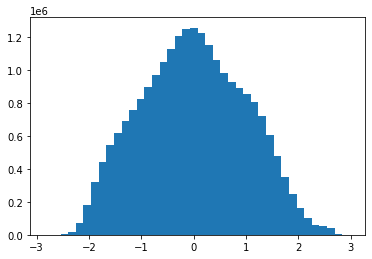

In [35]:
# Standardize dataset
file_path = os.path.join(ROOT, "RStudio/affymetrix", "GSE10846_rma_expression.txt")
rma_df = pd.read_table(file_path, sep="\t", index_col=0, header=0).T
rma_df.index = [file.split(".")[0] for file in rma_df.index]
rma_df = rma_df.loc[id_list,:]
rma_df[rma_df < 1] = 1
rma_df[rma_df.isna()] = 1
rma_df.columns.name = "ID_REF"
probe_col = rma_df.columns
rma_df = np.log2(rma_df)
rma_df = pd.DataFrame(scipy.stats.zscore(rma_df, axis=1), index=id_list, columns=probe_col) # convert to mean=0, std=1
ax = plt.hist(rma_df.values.reshape(-1),40)
plt.show()

In [36]:
# Convert probe-level expression to gene-level expression
rma_symbol_df = rma_df.T.copy()
rma_symbol_df.index = rma_symbol_df.index.map(chip_to_symbol_dict)
rma_symbol_df = rma_symbol_df.dropna()
rma_symbol_df = rma_symbol_df.groupby("ID_REF").mean()
rma_symbol_df = rma_symbol_df.T

expression_path = os.path.join(ROOT, "data", "GSE10846", "rma_expression.pickle")
rma_symbol_df.to_pickle(expression_path)
rma_symbol_df

ID_REF,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A4GALT,A4GNT,AA06,AAAS,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
GSM274895,0.250483,-0.077493,-0.481604,0.680742,-0.872887,-0.816125,0.237166,-0.473166,-0.197951,0.989608,...,0.783408,1.551263,-0.136288,-0.397011,0.349351,-0.189332,0.266235,1.591863,0.308180,0.928030
GSM274896,0.287434,-0.180338,-0.475191,1.078597,-0.724423,-0.715863,0.306345,-0.194919,-0.630116,1.065801,...,1.103447,1.617825,-0.147369,-0.357827,0.301984,0.059714,0.374835,1.647728,0.227537,0.936901
GSM274897,0.263764,-0.125450,-0.448012,0.716420,-0.980158,-0.910823,-0.080062,-0.313642,0.073370,1.038903,...,1.042110,1.877100,-0.176196,-0.592185,0.212929,1.095789,0.139804,1.419899,0.558837,0.936355
GSM274898,0.188392,-0.095935,-0.542306,0.644779,-1.076365,-0.959431,0.341400,-0.209829,-0.170003,1.141536,...,1.258510,1.866518,-0.182627,-0.472584,0.337141,0.309028,0.083331,1.228273,0.172442,1.059657
GSM274899,0.358193,-0.167614,-0.793441,0.719758,-0.917588,-0.637480,0.111358,-0.049947,-0.236670,0.994340,...,1.406891,1.903155,-0.190000,-0.375386,0.406699,0.591736,0.397054,1.390587,0.236005,1.084793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM361240,0.074042,-0.016344,-0.653286,-0.558286,-1.431482,-0.762061,0.384378,-0.415597,0.038610,0.822021,...,1.601707,1.878884,-0.029754,-0.197086,0.098335,1.517944,0.368171,0.405716,0.234565,1.193530
GSM361241,0.072617,0.074602,-0.762649,-0.025038,-0.648879,-0.833839,0.204137,-0.537336,-0.079852,0.679506,...,1.411443,1.903657,-0.108616,-0.310582,0.047042,-0.117027,0.258541,0.000269,0.378633,1.220691
GSM361242,0.054676,0.116503,-0.731804,-0.468043,-1.425628,-0.748734,-0.062067,-0.402208,-0.234295,0.558417,...,1.668344,1.923291,-0.013462,-0.410655,0.080537,1.085139,0.490796,0.049683,0.177806,1.236633
GSM361243,-0.468540,0.090592,-0.863272,-0.186568,-1.560475,-0.945831,0.268979,-0.346761,-0.380796,0.569264,...,1.451016,1.633035,0.017870,-0.364145,0.254654,-0.578536,0.477905,0.259385,0.347830,1.176230


# Gene expression profiling data

In [37]:
file_path = os.path.join(ROOT, "data", "GSE10846", "GSE10846_series_matrix.txt.gz")
df = pd.read_csv(file_path, sep="\t", skiprows=lambda x: x not in range(28, 82), header=0, index_col=0).T
df.columns = [c.replace("!", "") for c in df.columns]
df = df.set_index("Sample_geo_accession")

array_type_dict = {"GCB DLBCL" : "GCB",
                  "ABC DLBCL"  : "ABC",
                  "UnclassifiedDLBCL" : np.nan,
                  np.nan : np.nan}

df = df.loc[:, "Sample_characteristics_ch1"]
df.columns = [s.split(": ")[-2] for s in df.iloc[0,]]
df = df.applymap(lambda x: x.split(": ")[-1])
df["GEP"] = df["Final microarray diagnosis"].map(array_type_dict)

clinical_df_path = os.path.join(ROOT, "data", "GSE10846", "clinical.csv")
df.to_csv(clinical_df_path)
df

,Gender,Age,Tissue,Disease state,Individual,Submitting diagnosis,Final microarray diagnosis,Follow up status,Follow up years,Chemotherapy,ECOG performance status,Stage,LDH ratio,Number of extranodal sites,GEP
Sample_geo_accession,,,,,,,,,,,,,,,
GSM274895,male,52,lymph node,Lymphoma,549,DLBCL,GCB DLBCL,DEAD,2.68,CHOP-Like Regimen,1,3,NA,0,GCB
GSM274896,male,75,lymph node,Lymphoma,553,DLBCL,GCB DLBCL,DEAD,0.82,CHOP-Like Regimen,0,3,1.12,0,GCB
GSM274897,female,76,lymph node,Lymphoma,689,DLBCL,ABC DLBCL,DEAD,2.54,CHOP-Like Regimen,3,1,1.01,0,ABC
GSM274898,female,56,lymph node,Lymphoma,704,DLBCL,ABC DLBCL,ALIVE,9.67,CHOP-Like Regimen,1,3,1.380952381,0,ABC
GSM274899,male,46,lymph node,Lymphoma,694,DLBCL,ABC DLBCL,ALIVE,4.83,CHOP-Like Regimen,1,2,0.68,0,ABC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM361240,NA,NA,lymph node,Lymphoma,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NaN
GSM361241,NA,NA,lymph node,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NaN
GSM361242,NA,NA,lymph node,Lymphoma,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NaN
